In [3]:
import numpy as np
import cv2
import time
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
    
#import potrebnih biblioteka

import collections

# keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12 # za prikaz većih slika i plotova, zakomentarisati ako nije potrebno

#Funkcionalnost implementirana u V1
def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
def image_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
def image_bin(image_gs):
    ret,image_bin = cv2.threshold(image_gs, 127, 255, cv2.THRESH_BINARY)
    return image_bin
def invert(image):
    return 255-image
def display_image(image, color= False):
    if color:
        plt.imshow(image)
    else:
        plt.imshow(image, 'gray')
def dilate(image):
    kernel = np.ones((3,3)) # strukturni element 3x3 blok
    return cv2.dilate(image, kernel, iterations=1)
def erode(image):
    kernel = np.ones((3,3)) # strukturni element 3x3 blok
    return cv2.erode(image, kernel, iterations=1)
def remove_noise(image):
     # strukturni element 3x3 blok
    return dilate(erode(image))
#Funkcionalnost implementirana u V2
def resize_region(region):
    resized = cv2.resize(region,(200,200), interpolation = cv2.INTER_NEAREST)
    return resized
def scale_to_range(image):
    return image / 255
def matrix_to_vector(image):
    return image.flatten()
def prepare_for_ann(regions):
    ready_for_ann = []
    for region in regions:
        ready_for_ann.append(matrix_to_vector(scale_to_range(region)))
    return ready_for_ann
def convert_output(outputs):
    return np.eye(len(outputs))
def winner(output):
    return max(enumerate(output), key=lambda x: x[1])[0]

Using Theano backend.


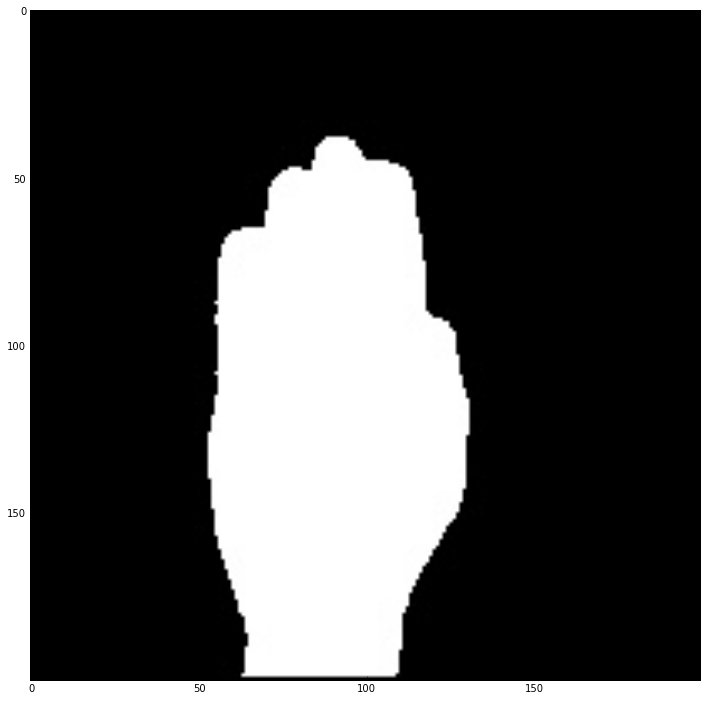

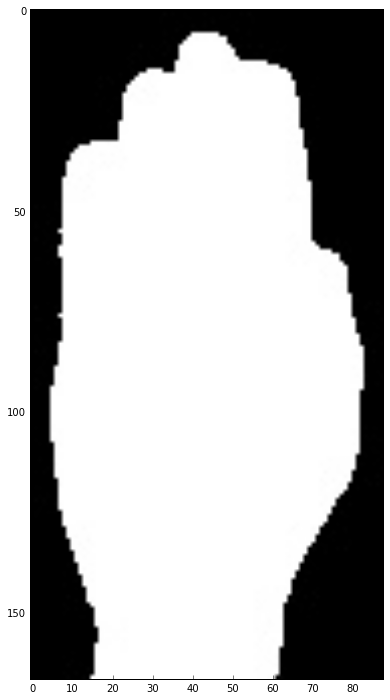

In [5]:
        string='images/capture'+str(2)+'.jpg'
        img=invert(cv2.imread(string,0))
        
        #imga, contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        contours = cv2.findContours(img.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)[-2]
        if len(contours)>0:
            max_area = -1
            for m in range(len(contours)):
                cnt=contours[m]
                
                area = cv2.contourArea(cnt)
                if(area>max_area):
                        max_area=area
                        ci=m
                        
                        
        cnt=contours[ci]
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),0)
        
        display_image(img)
        plt.figure()
        string='images/capture'+str(2+500)+'.jpg'
        img2=img[y:y+h,x:x+w]
        cv2.imwrite(string,resize_region(invert(img2)))
        display_image(img2)
        plt.figure()